In [2]:
import os 

import shutil

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import layers
from tensorflow.keras import models

In [14]:
#Original data path
original_dataset_dir='./datasets/train'

#Small Dataset Path
base_dir='./datasets/cats_and_dogs_small'

if os.path.exists(base_dir):
    shutil.rmtree(base_dir)
    
os.mkdir(base_dir)

In [15]:
# Training validation, Test data

train_dir=os.path.join(base_dir,'train')
os.mkdir(train_dir)

validation_dir=os.path.join(base_dir,'validation')
os.mkdir(validation_dir)

test_dir=os.path.join(base_dir,'test')
os.mkdir(test_dir)

In [16]:
train_cats_dir=os.path.join(train_dir,'cats')
train_dogs_dir=os.path.join(train_dir,'dogs')

validation_cats_dir=os.path.join(validation_dir,'cats')
validation_dogs_dir=os.path.join(validation_dir,'dogs')

test_cats_dir=os.path.join(test_dir,'cats')
test_dogs_dir=os.path.join(test_dir,'dogs')

os.mkdir(train_cats_dir)
os.mkdir(train_dogs_dir)

os.mkdir(validation_cats_dir)
os.mkdir(validation_dogs_dir)

os.mkdir(test_cats_dir)
os.mkdir(test_dogs_dir)

In [17]:
#file copy and slicing 

fnames=[]
for i in range(1000):
    filename='cat.{}.jpg'.format(i)
    fnames.append(filename)
print(fnames)

['cat.0.jpg', 'cat.1.jpg', 'cat.2.jpg', 'cat.3.jpg', 'cat.4.jpg', 'cat.5.jpg', 'cat.6.jpg', 'cat.7.jpg', 'cat.8.jpg', 'cat.9.jpg', 'cat.10.jpg', 'cat.11.jpg', 'cat.12.jpg', 'cat.13.jpg', 'cat.14.jpg', 'cat.15.jpg', 'cat.16.jpg', 'cat.17.jpg', 'cat.18.jpg', 'cat.19.jpg', 'cat.20.jpg', 'cat.21.jpg', 'cat.22.jpg', 'cat.23.jpg', 'cat.24.jpg', 'cat.25.jpg', 'cat.26.jpg', 'cat.27.jpg', 'cat.28.jpg', 'cat.29.jpg', 'cat.30.jpg', 'cat.31.jpg', 'cat.32.jpg', 'cat.33.jpg', 'cat.34.jpg', 'cat.35.jpg', 'cat.36.jpg', 'cat.37.jpg', 'cat.38.jpg', 'cat.39.jpg', 'cat.40.jpg', 'cat.41.jpg', 'cat.42.jpg', 'cat.43.jpg', 'cat.44.jpg', 'cat.45.jpg', 'cat.46.jpg', 'cat.47.jpg', 'cat.48.jpg', 'cat.49.jpg', 'cat.50.jpg', 'cat.51.jpg', 'cat.52.jpg', 'cat.53.jpg', 'cat.54.jpg', 'cat.55.jpg', 'cat.56.jpg', 'cat.57.jpg', 'cat.58.jpg', 'cat.59.jpg', 'cat.60.jpg', 'cat.61.jpg', 'cat.62.jpg', 'cat.63.jpg', 'cat.64.jpg', 'cat.65.jpg', 'cat.66.jpg', 'cat.67.jpg', 'cat.68.jpg', 'cat.69.jpg', 'cat.70.jpg', 'cat.71.jpg', '

In [21]:
#cat train data copy
fnames=['cat.{}.jpg'.format(i) for i in range(1000)] #same thing as above
for fname in fnames:
    src=os.path.join(original_dataset_dir,fname)
    dst=os.path.join(train_cats_dir,fname)
    shutil.copyfile(src,dst)
#dog train data copy
fnames=['dog.{}.jpg'.format(i) for i in range(1000)] 
for fname in fnames:
    src=os.path.join(original_dataset_dir,fname)
    dst=os.path.join(train_dogs_dir,fname)
    shutil.copyfile(src,dst)
print('-----------Train dataset copy completed')

-----------Train dataset copy completed


In [20]:
#cat validation data copy
fnames=['cat.{}.jpg'.format(i) for i in range(1000,1500)] 
for fname in fnames:
    src=os.path.join(original_dataset_dir,fname)
    dst=os.path.join(validation_cats_dir,fname)
    shutil.copyfile(src,dst)
#dog validation data copy
fnames=['dog.{}.jpg'.format(i) for i in range(1000,1500)] 
for fname in fnames:
    src=os.path.join(original_dataset_dir,fname)
    dst=os.path.join(validation_dogs_dir,fname)
    shutil.copyfile(src,dst)
print('-------Validation dataset copy completed')

-------Validation dataset copy completed


In [22]:
#cat test data copy
fnames=['cat.{}.jpg'.format(i) for i in range(1500,2000)] 
for fname in fnames:
    src=os.path.join(original_dataset_dir,fname)
    dst=os.path.join(test_cats_dir,fname)
    shutil.copyfile(src,dst)
#dog test data copy
fnames=['dog.{}.jpg'.format(i) for i in range(1500,2000)] 
for fname in fnames:
    src=os.path.join(original_dataset_dir,fname)
    dst=os.path.join(test_dogs_dir,fname)
    shutil.copyfile(src,dst)
print('-------Test dataset copy completed')

-------Test dataset copy completed


In [26]:
print('Train cat images',len(os.listdir(train_cats_dir)))
print('Train dog images',len(os.listdir(train_dogs_dir)))
print('Validation cat images',len(os.listdir(validation_cats_dir)))
print('Validation dog images',len(os.listdir(validation_dogs_dir)))
print('Test cat images',len(os.listdir(test_cats_dir)))
print('Test dog images',len(os.listdir(test_dogs_dir)))

Train cat images 1000
Train dog images 1000
Validation cat images 500
Validation dog images 500
Test cat images 500
Test dog images 500


In [27]:
#build network

from tensorflow.keras import layers
from tensorflow.keras import models

model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3))) #3>>because they're color images
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [28]:
from tensorflow.keras import optimizers

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [40]:
#Data Preprocessing

#Image Scaling>> make every image the same size

from tensorflow.keras.preprocessing.image import ImageDataGenerator 
train_datagen=ImageDataGenerator(rescale=1./255)
validation_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(
                                train_dir,
                                target_size=(150,150),
                                batch_size=20,
                                class_mode='binary')

validation_generator=validation_datagen.flow_from_directory(
                                validation_dir,
                                target_size=(150,150),
                                batch_size=20,
                                class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
for data_batch,labels_batch in train_generator:
    print('Batch Data Size:',data_batch.shape)
    print('Batch Label Size:',labels_batch.shape)


In [43]:
history=model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/30
100/100 [==============================] - 50s 496ms/step - loss: 0.0973 - accuracy: 0.9790 - val_loss: 3.5377 - val_accuracy: 0.7240
Epoch 2/30
100/100 [==============================] - 50s 496ms/step - loss: 0.0532 - accuracy: 0.9870 - val_loss: 3.8865 - val_accuracy: 0.7330
Epoch 3/30
100/100 [==============================] - 50s 503ms/step - loss: 0.0571 - accuracy: 0.9885 - val_loss: 2.9258 - val_accuracy: 0.7150
Epoch 4/30
100/100 [==============================] - 50s 496ms/step - loss: 0.0232 - accuracy: 0.9920 - val_loss: 3.7516 - val_accuracy: 0.7260
Epoch 5/30
100/100 [==============================] - 50s 499ms/step - loss: 0.0705 - accuracy: 0.9895 - val_loss: 4.4561 - val_accuracy: 0.7200
Epoch 6/30
100/100 [==============================] - 50s 503ms/step - loss: 0.0419 - accuracy: 0.9915 - val_loss: 3.6154 - val_accuracy: 0.7170
Epoch 7/30
100/100 [==============================] - 50s 499ms/step - loss: 0.0470 - accuracy: 0.9900 - val_loss: 3.6761 - val_ac

In [44]:
model.save('cats_and_dogs_small_1.0.h5')

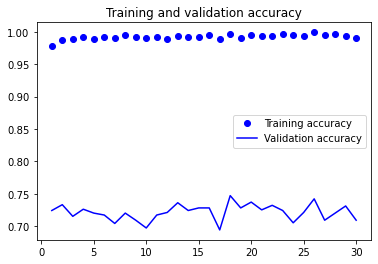

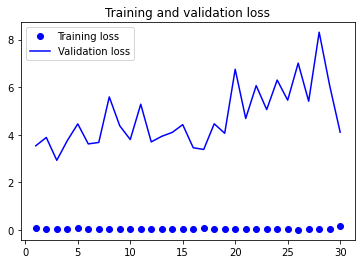

In [45]:
import matplotlib.pyplot as plt 

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training accuracy')
plt.plot(epochs,val_acc,'b-',label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b-',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

In [46]:
datagen=ImageDataGenerator(rotation_range=40,
                         width_shift_range=40,
                          height_shift_range=0.2,
                          shear_range=0.2,
                          zoom_range=0.2,
                          horizontal_flip=True,
                          fill_mode='nearest')

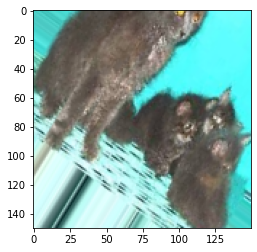

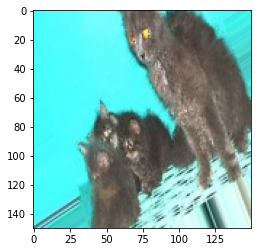

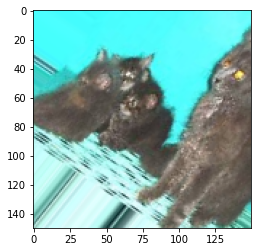

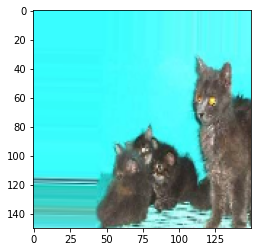

In [51]:
from tensorflow.keras.preprocessing import image

fnames=sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)])

img_path=fnames[4]

img=image.load_img(img_path, target_size=(150,150))

x=image.img_to_array(img)
x=x.reshape((1,)+x.shape)

i=0
for batch in datagen.flow(x,batch_size=1):
    plt.figure(i)
    imgplot=plt.imshow(image.array_to_img(batch[0]))
    i+=1
    if i%4==0:
        break
plt.show()

In [54]:
train_datagen = ImageDataGenerator( rescale=1./255,  
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir,      
                                                    target_size=(150, 150),
                                                    batch_size=32,           
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=32,
                                                        class_mode='binary')
history = model.fit_generator(train_generator,
                              steps_per_epoch=10,
                              epochs=100,
                              validation_data=validation_generator,
                              validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
10/10 [==============================] - 12s 1s/step - loss: 0.6262 - accuracy: 0.6687 - val_loss: 0.5600 - val_accuracy: 0.7130
Epoch 2/100
10/10 [==============================] - 12s 1s/step - loss: 0.5855 - accuracy: 0.6743 - val_loss: 0.6836 - val_accuracy: 0.6200
Epoch 3/100
10/10 [==============================] - 12s 1s/step - loss: 0.6876 - accuracy: 0.6250 - val_loss: 0.5963 - val_accuracy: 0.6960
Epoch 4/100
10/10 [==============================] - 12s 1s/step - loss: 0.6455 - accuracy: 0.6344 - val_loss: 0.6566 - val_accuracy: 0.6420
Epoch 5/100
10/10 [==============================] - 12s 1s/step - loss: 0.6307 - accuracy: 0.6250 - val_loss: 0.5861 - val_accuracy: 0.7240
Epoch 6/100
10/10 [==============================] - 12s 1s/step - loss: 0.6493 - accuracy: 0.6719 - val_loss: 0.5564 - val_accuracy: 0.7310
Epoch 7/100
10/10 [==============================] - 11s 1s/step - los